In [18]:
#import statements
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as ply
import seaborn as sns

#sci-kit learn
import sklearn
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.dummy import DummyClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
data = pd.read_csv('clean.csv', index_col=0)

In [3]:
data['district_code'] = data.district_code.astype(dtype= str)

In [4]:
X = data.drop(columns=['status_group'])
y = data['status_group']

In [5]:
categorical_col = X.select_dtypes(include= object).columns.to_list()
categorical_col

['installer',
 'basin',
 'region',
 'district_code',
 'lga',
 'management',
 'extraction_type',
 'payment',
 'water_quality',
 'quantity',
 'source',
 'waterpoint_type']

In [6]:
#import pandas as pd
data_encoded = pd.get_dummies(X, columns = categorical_col)

In [7]:
#Extract only the columns that didnt need to be encoded
data_num_col = X.drop(columns=categorical_col)

#Concatenate the two dataframes : 
data_out = pd.concat([data_encoded, data_num_col], axis=1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [14]:
base_model = DummyClassifier()
base_model.fit(X_train, y_train)

C:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


DummyClassifier()

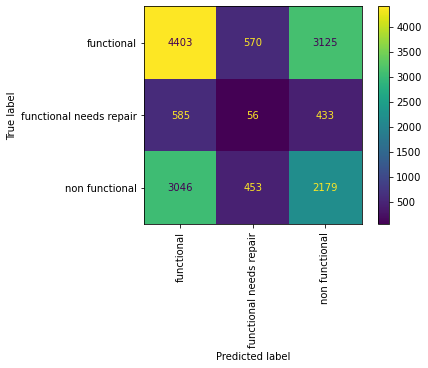

In [17]:
plot_confusion_matrix(base_model, X_test, y_test, xticks_rotation='vertical');

In [19]:
y_base_pred = base_model.predict(X_test)

In [21]:
print(classification_report(y_test, y_base_pred))

                         precision    recall  f1-score   support

             functional       0.54      0.55      0.54      8098
functional needs repair       0.08      0.08      0.08      1074
         non functional       0.38      0.37      0.37      5678

               accuracy                           0.45     14850
              macro avg       0.33      0.33      0.33     14850
           weighted avg       0.45      0.45      0.45     14850



In [24]:
print('base accuracy', accuracy_score(y_test, y_base_pred))
print('base recall', recall_score(y_test, y_base_pred, average='weighted'))
print('base precision', precision_score(y_test, y_base_pred, average='weighted'))


base accuracy 0.4451851851851852
base recall 0.4451851851851852
base precision 0.445051350861212
